<a href="https://colab.research.google.com/github/Sirfowahid/Transformer_Machine_Translator_Bangla2English/blob/main/Machine_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers[torch] datasets sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset
data = load_dataset('kde4',lang1="bn",lang2="en")
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for kde4 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/kde4
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 36381
    })
})

In [ ]:
small = data['train'].shuffle(seed=123).select(range(1000))

In [ ]:
split = small.train_test_split(seed=123)

In [ ]:
split['train'][0]

{'id': '3598',
 'translation': {'bn': 'বিভক্ত ভিউ মোড@ option: check Startup Settings',
  'en': 'Split view mode'}}

In [ ]:
from transformers import AutoTokenizer

checkpoint = 'Helsinki-NLP/opus-mt-bn-en'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.25M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
bn = split['train'][5]['translation']['bn']
en = split['train'][5]['translation']['en']
bn, en

('ফ্রেম সংক্রান্ত তথ্যাবলী দেখাও', 'View Frame Information')

In [ ]:
inputs = tokenizer(bn)
inputs

{'input_ids': [3963, 363, 13479, 2522, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
with tokenizer.as_target_tokenizer():
  targets = tokenizer(en)

targets

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3892: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [881, 8977, 2703, 0], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁View', '▁Frame', '▁Information', '</s>']

In [ ]:
bad_targets = tokenizer(en)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁', 'View', '▁F', 'ram', 'e', '▁', 'In', 'format', 'ion', '</s>']

In [ ]:
import matplotlib.pyplot as plt
train = split['train']['translation']
input_lens = [len(tr['bn']) for tr in train]

In [ ]:
train = split['train']['translation']
target_lens = [len(tr['en']) for tr in train]

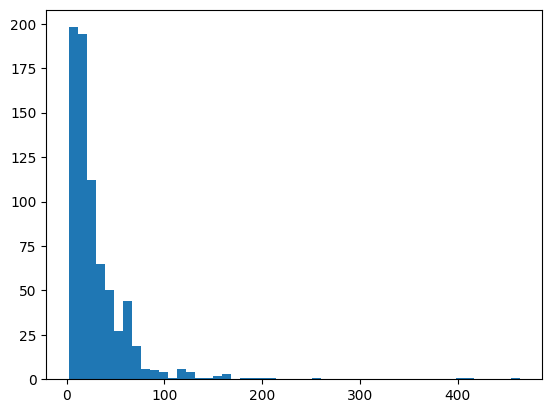

In [ ]:
plt.hist(input_lens,bins=50)
plt.show()

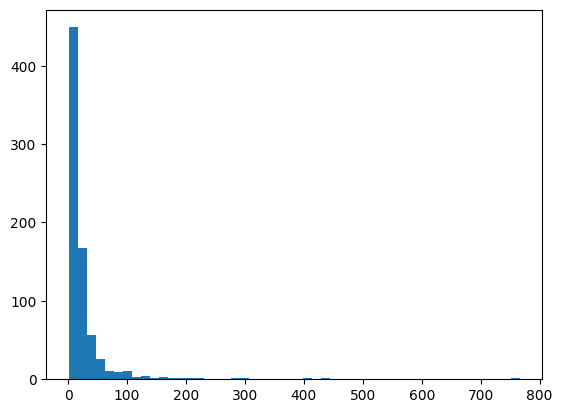

In [ ]:
plt.hist(target_lens,bins=50)
plt.show()

In [ ]:
max_input_len = 128
max_target_len = 128

def tokenizer_fn(batch):
    inputs = [x['bn'] for x in batch['translation']]
    targets = [x['en'] for x in batch['translation']]

    tokenized_inputs = tokenizer(
        inputs,
        max_length=max_input_len,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )

    tokenized_targets = tokenizer(
        targets,
        max_length=max_target_len,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )

    tokenized_inputs['labels'] = tokenized_targets['input_ids']

    return tokenized_inputs

column_names = split['train'].column_names

tokenized_datasets = split.map(
    tokenizer_fn,
    batched=True,
    remove_columns=column_names,
)


Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

pytorch_model.bin:   0%|          | 0.00/309M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer,model=model)

In [ ]:
[tokenized_datasets['train'][i] for i in range(1,3)]

[{'input_ids': [3823,
   5218,
   0,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   63596,
   

In [ ]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(1,3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [ ]:
batch['decoder_input_ids']

tensor([[63596,  2460,     0, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596, 63596,
         63596, 63596, 63596, 63596, 63596, 63596, 6

In [ ]:
tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0])

['<pad>',
 '▁Home',
 '</s>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 '<pad>',
 

In [ ]:
split['train'][1]

{'id': '7097', 'translation': {'bn': 'হোম পেজ', 'en': 'Home'}}

In [ ]:
!pip install sacrebleu bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_metric

bleu_metric = load_metric('sacrebleu')
bert_metric = load_metric('bertscore')

<ipython-input-25-abbeae5e0300>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric('sacrebleu')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for bertscore contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/bertscore/bertscore.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
bleu_metric.compute(predictions=['I love cats'],references=[['I love dogs']])

{'score': 0.0,
 'counts': [2, 1, 0, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [66.66666666666667, 50.0, 50.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [ ]:
import numpy as np
def compute_metrics(preds_and_labels):
  preds,labels = preds_and_labels
  decoded_preds = tokenizer.batch_decode(preds,skip_special_tokens=True)
  labels = np.where(labels != -100, labels,tokenizer.pad_token_id)
  decoded_labels = tokenizer.batch_decode(labels,skip_special_tokens=True)

  decoded_preds = [pred.strip() for pred in decoded_preds]
  decoded_labels = [[label.strip() for label in decoded_labels]]

  bleu = bleu_metric.compute(
      predictions=decoded_preds,references=decoded_labels
  )
  bert_score = bert_metric.compute(
      predictions=decoded_preds,references=decoded_labels
  )

  return {"bleu":bleu['score'],'bert_socre':np.mean(bert_score['f1'])}

In [ ]:
from transformers import Seq2SeqTrainingArguments
training_args = Seq2SeqTrainingArguments(
    'finetuned-model',
    evaluation_strategy='no',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True
)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
trainer.train()

Step,Training Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[63596]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[63596]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strate

TrainOutput(global_step=72, training_loss=1.9884490966796875, metrics={'train_runtime': 47.5383, 'train_samples_per_second': 47.33, 'train_steps_per_second': 1.515, 'total_flos': 76271321088000.0, 'train_loss': 1.9884490966796875, 'epoch': 3.0})

In [ ]:
from transformers import pipeline
translator = pipeline('translation',model='my_saved_model',device=0)